# Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read the input data

In [2]:
df = pd.read_csv('diamonds.csv')

# Take a look at the data

In [3]:
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


# Check for null values

In [4]:
print(df.isna().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


# Remove the index column

In [5]:
df = df.drop(df.columns[0], axis = 1)

print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [6]:
print(df['price'].min())
print(df['price'].max())

326
18823


# Normalize the numerical inputs

In [7]:
def normalize_column(df, column):
    max_value = df[column].max()
    min_value = df[column].min()
    df[column] = (df[column] - min_value)/(max_value - min_value)
    return df

In [8]:
df = normalize_column(df, "carat")
df = normalize_column(df, "depth")
df = normalize_column(df, "table")
df = normalize_column(df, "price")
df = normalize_column(df, "x")
df = normalize_column(df, "y")
df = normalize_column(df, "z")

In [9]:
print(df.head())

      carat      cut color clarity     depth     table     price         x  \
0  0.006237    Ideal     E     SI2  0.513889  0.230769  0.000000  0.367784   
1  0.002079  Premium     E     SI1  0.466667  0.346154  0.000000  0.362197   
2  0.006237     Good     E     VS1  0.386111  0.423077  0.000054  0.377095   
3  0.018711  Premium     I     VS2  0.538889  0.288462  0.000433  0.391061   
4  0.022869     Good     J     SI2  0.563889  0.288462  0.000487  0.404097   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  


# Convert categorical input to one hot encoding

In [10]:
def make_one_hot_encoding(df, column):
    values = df.pop(column)
    unique_values = values.unique()
    unique_values = sorted(unique_values)
    for unique_value in unique_values:
        df[column + str(unique_value)] = (values == unique_value)*1.0
    return df

In [11]:
df = make_one_hot_encoding(df, "cut")
df = make_one_hot_encoding(df, "color")
df = make_one_hot_encoding(df, "clarity")

# Take a look at the final transformed data

In [12]:
print(df.head())

      carat     depth     table     price         x         y         z  \
0  0.006237  0.513889  0.230769  0.000000  0.367784  0.067572  0.076415   
1  0.002079  0.466667  0.346154  0.000000  0.362197  0.065195  0.072642   
2  0.006237  0.386111  0.423077  0.000054  0.377095  0.069100  0.072642   
3  0.018711  0.538889  0.288462  0.000433  0.391061  0.071817  0.082704   
4  0.022869  0.563889  0.288462  0.000487  0.404097  0.073854  0.086478   

   cutFair  cutGood  cutIdeal  ...  colorI  colorJ  clarityI1  clarityIF  \
0      0.0      0.0       1.0  ...     0.0     0.0        0.0        0.0   
1      0.0      0.0       0.0  ...     0.0     0.0        0.0        0.0   
2      0.0      1.0       0.0  ...     0.0     0.0        0.0        0.0   
3      0.0      0.0       0.0  ...     1.0     0.0        0.0        0.0   
4      0.0      1.0       0.0  ...     0.0     1.0        0.0        0.0   

   claritySI1  claritySI2  clarityVS1  clarityVS2  clarityVVS1  clarityVVS2  
0         0.0 

# Shuffle the data

In [13]:
df = df.sample(frac=1)

# Split the data into training set and test set

In [14]:
price = df.pop('price')

In [15]:
print(df.shape)
print(price.shape)

(53940, 26)
(53940,)


In [16]:
x_train = df.iloc[:45000, :].to_numpy()
y_train = price.iloc[:45000].to_numpy()

x_test = df.iloc[45000:, :].to_numpy()
y_test = price.iloc[45000:].to_numpy()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45000, 26)
(45000,)
(8940, 26)
(8940,)


In [18]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[26]))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3456      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 20,097
Trainable params: 20,097
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

In [20]:
model.fit(x_train, y_train, epochs=20)

Train on 45000 samples
Epoch 1/20
45000/45000 [==============================] - 4s 82us/sample - loss: 0.0062 - mae: 0.05170s - loss: 0.0063 - mae: 0.0
Epoch 2/20
45000/45000 [==============================] - 3s 69us/sample - loss: 0.0020 - mae: 0.0280
Epoch 3/20
45000/45000 [==============================] - 3s 65us/sample - loss: 0.0016 - mae: 0.0245
Epoch 4/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.0015 - mae: 0.0230
Epoch 5/20
45000/45000 [==============================] - 3s 65us/sample - loss: 0.0014 - mae: 0.0219
Epoch 6/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.0013 - mae: 0.0212
Epoch 7/20
45000/45000 [==============================] - 3s 65us/sample - loss: 0.0013 - mae: 0.0208
Epoch 8/20
45000/45000 [==============================] - 3s 65us/sample - loss: 0.0012 - mae: 0.0203
Epoch 9/20
45000/45000 [==============================] - 3s 66us/sample - loss: 0.0012 - mae: 0.0200
Epoch 10/20
45000/45000 [======

In [21]:
predictions = model.predict(x_test)

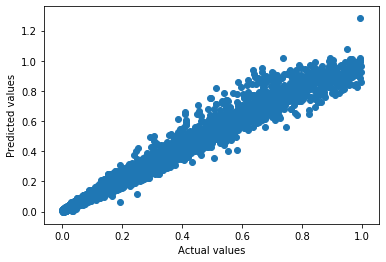

In [22]:
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()